<a href="https://colab.research.google.com/github/rutujas11/Machine-Learning-Models/blob/main/unsupervised_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_row = pd.read_csv('/content/drive/MyDrive/Demo Datasets/Pokemon.csv')
df_row.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
df = df_row.drop('#',axis = 1)

In [ ]:
df.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
types = df['Type 1'].isin(['Grass','Fire','Water'])
drop_cols = ['Type 1','Type 2','Generation','Legendary']
df = df[types].drop(columns = drop_cols)
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 3)
df['cluster'] = kmeans.fit_predict(df[['Attack','Defense']])

centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

df['cen_x'] = df.cluster.map({0: cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0: cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


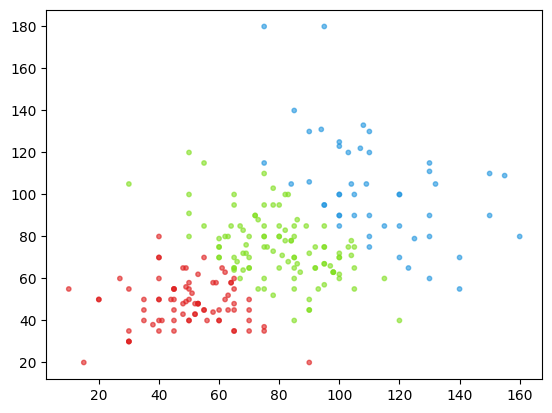

In [ ]:
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)

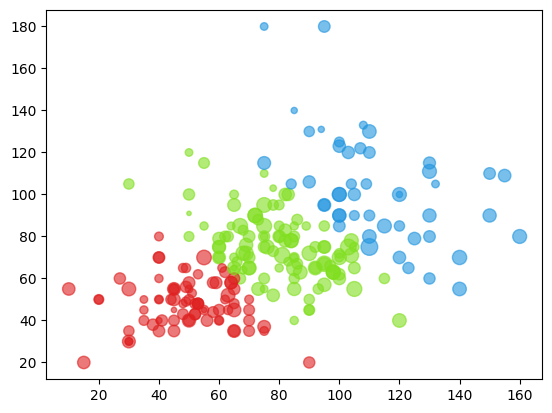

In [ ]:
plt.scatter(df.Attack,df.Defense,c = df.c, s = df.Speed, alpha = 0.6)

Text(0, 0.5, 'Defense')

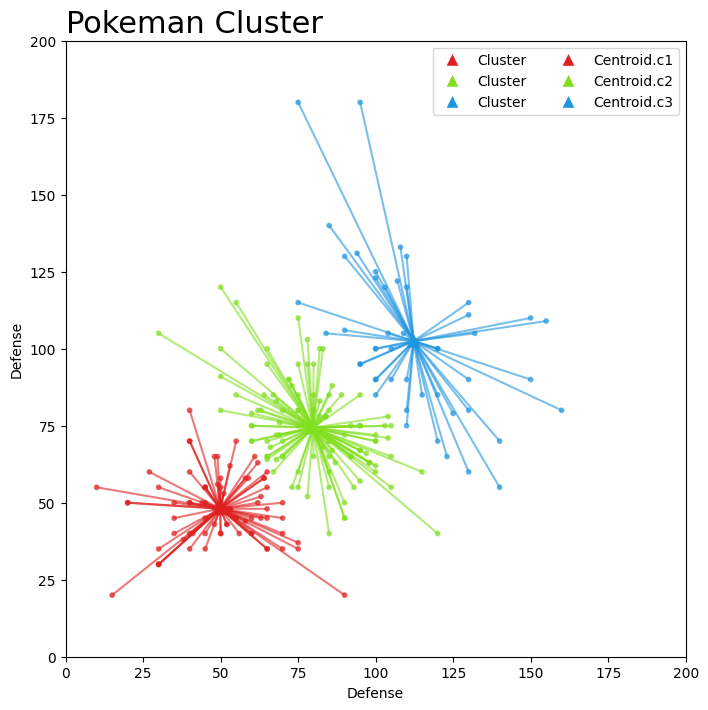

In [ ]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, figsize = (8,8))

plt.scatter(df.Attack, df.Defense, c=df.c, alpha=0.6, s=10)

plt.scatter(cen_x, cen_y, marker = '^',c = colors, s=70)

for idx, val in df.iterrows():
  x = [val.Attack,val.cen_x]
  y = [val.Defense,val.cen_y]
  plt.plot(x,y,c=val.c, alpha = 0.6)

#centroids
cent_leg = [Line2D([0], [0], marker = '^',color = 'w', label = 'Centroid.c{}'.format(i+1),
                   markerfacecolor = mcolor, markersize=10) for i, mcolor in enumerate(colors)]
 #legend
legend_elements =  [Line2D([0], [0], marker = '^',color = 'w', label = 'Cluster'.format(i+1),
                   markerfacecolor = mcolor, markersize=10) for i, mcolor in enumerate(colors)]

legend_elements.extend([Line2D([0], [0], marker = '^',color = 'w', label = 'Centroid.c{}'.format(i+1),
                   markerfacecolor = mcolor, markersize=10) for i, mcolor in enumerate(colors)])

plt.legend(handles = legend_elements, loc = 'upper right', ncol = 2)
plt.xlim(0,200)
plt.ylim(0,200)
plt.title('Pokeman Cluster', loc = 'left', fontsize = 22)
plt.xlabel('Defense')
plt.ylabel('Defense')

